In [30]:
data = pd.read_csv("test.csv", encoding="ISO-8859-1")  

In [31]:
data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [32]:
df = data[["text","sentiment"]]

In [33]:
df.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [34]:
df["text"][0]

'Last session of the day  http://twitpic.com/67ezh'

In [35]:
df.shape

(4815, 2)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3534 non-null   object
 1   sentiment  3534 non-null   object
dtypes: object(2)
memory usage: 75.4+ KB


In [37]:
df.isnull().sum()

text         1281
sentiment    1281
dtype: int64

In [38]:
df_duplicates = df[df.duplicated(subset=['text', 'sentiment'], keep=False)]

In [ ]:
df_duplicates

,text,sentiment
3534,NaN,NaN
3535,NaN,NaN
3536,NaN,NaN
3537,NaN,NaN
3538,NaN,NaN
...,...,...
4810,NaN,NaN
4811,NaN,NaN
4812,NaN,NaN
4813,NaN,NaN


In [39]:
df.dropna(inplace=True)

C:\Users\$\AppData\Local\Temp\ipykernel_14392\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [40]:
df.shape

(3534, 2)

In [41]:
4815-1281

3534

In [42]:
df["sentiment"].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

C:\Users\$\AppData\Local\Temp\ipykernel_14392\1855621552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.sentiment.index, y=df.sentiment.values, palette="viridis")


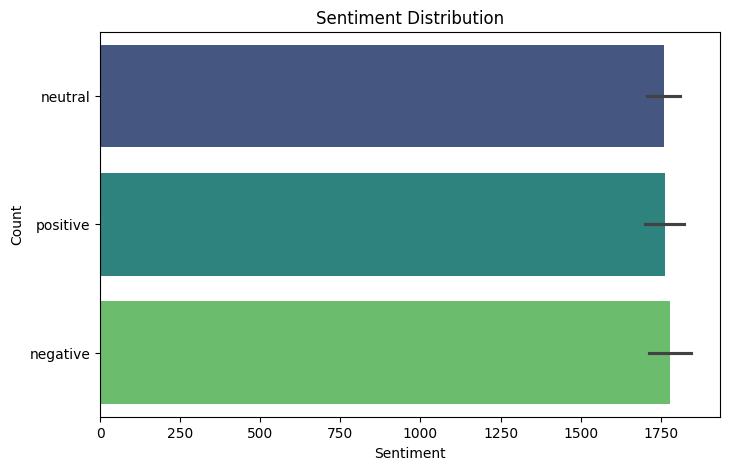

In [44]:
# Plot sentiment distribution
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=df.sentiment.index, y=df.sentiment.values, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [45]:
df['text_length'] = df['text'].apply(len)

C:\Users\$\AppData\Local\Temp\ipykernel_14392\666520837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)


In [46]:
df["text_length"]

0        49
1       103
2        78
3        12
4        39
       ... 
3529     58
3530    138
3531    102
3532     74
3533     53
Name: text_length, Length: 3534, dtype: int64

In [48]:
df_len = df["text_length"]

In [49]:
df_len

0        49
1       103
2        78
3        12
4        39
       ... 
3529     58
3530    138
3531    102
3532     74
3533     53
Name: text_length, Length: 3534, dtype: int64

In [54]:
df = df.drop(columns=["text_length"])

In [55]:
df

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch

In [57]:
X = df["text"]
y = df["sentiment"]

In [59]:
X

0       Last session of the day  http://twitpic.com/67ezh
1        Shanghai is also really exciting (precisely -...
2       Recession hit Veronique Branquinho, she has to...
3                                             happy bday!
4                  http://twitpic.com/4w75p - I like it!!
                              ...                        
3529    its at 3 am, im very tired but i can`t sleep  ...
3530    All alone in this old house again.  Thanks for...
3531     I know what you mean. My little dog is sinkin...
3532    _sutra what is your next youtube video gonna b...
3533     http://twitpic.com/4woj2 - omgssh  ang cute n...
Name: text, Length: 3534, dtype: object

In [60]:
y

0        neutral
1       positive
2       negative
3       positive
4       positive
          ...   
3529    negative
3530    positive
3531    negative
3532    positive
3533    positive
Name: sentiment, Length: 3534, dtype: object

In [63]:
import re
def remove_urls(text):
    # Regular expression to match URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.sub(url_pattern, '', text)

In [64]:
df["text"] = df["text"].apply(remove_urls)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

ValueError: could not convert string to float: 'http://twitpic.com/66nbd - Ready for our 3D Jonas Brothers Experience. Real Brothers, not included'

In [ ]:
df["text"][1]

' Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).'

In [ ]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char, "")
    return text 

In [ ]:
df["text"] = df["text"].apply(remove_punc)

In [ ]:
df["text"][1]

' shanghai is also really exciting precisely  skyscrapers galore good tweeps in china  sh  bj'

In [ ]:
df["text"] = df["text"].str.lower()

In [ ]:
list(df["text"].head(10))

['last session of the day  ',
 ' shanghai is also really exciting precisely  skyscrapers galore good tweeps in china  sh  bj',
 'recession hit veronique branquinho she has to quit her company such a shame',
 ' happy bday',
 '   i like it',
 ' thats great weee visitors',
 'i think everyone hates me on here   lol',
 ' soooooo wish i could but im in school and myspace is completely blocked',
 ' and within a short time of the last clue all of them',
 ' what did you get  my day is alright havent done anything yet leaving soon to my stepsister though']

In [87]:

def remove_urls(text):
    # Regular expression to match URLs
    url_pattern = r'http\S+|www\S+'
    return re.sub(url_pattern, '', text)

df["text"] = df["text"].apply(remove_urls)

In [88]:
X = df["text"]
y = df["sentiment"]

In [94]:

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [96]:
y_train

array([1, 0, 2, ..., 2, 2, 1], shape=(2827,))

In [99]:
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer 
import re 
import string 
from nltk.corpus import stopwords 
from collections import Counter 



In [100]:
df = pd.read_csv("test.csv",encoding="ISO-8859-1")

In [101]:
df = df[["text","sentiment"]]

In [102]:
df.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [103]:
print(df["sentiment"].value_counts())

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


In [115]:
def preprocess_text_st(text):
    if isinstance(text, str):

        # Lowercase
        text = text.lower()

        # Remove URLs using regular expression
        text = re.sub(r'http\S+|www.\S+', '', text)

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Remove stop words
        stop_words = set(stopwords.words('english'))

        text_list = text.split()
        filtered_words = [word for word in text_list if word not in stop_words]
        text = ' '.join(filtered_words)
        return text
    else:
        return " "

df['processed_text_st'] = df['text'].apply(preprocess_text)
df.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [112]:
# Download nltk resources too for some text processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [113]:
from nltk improt data

SyntaxError: invalid syntax (3709462526.py, line 1)